# Beat & Standing Wave (by Python)

#### import packages

In [1]:
import numpy as np
π = np.pi

from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# packages for animation and interaction in Jupyter notebook
from IPython.display import HTML
from ipywidgets import interact
import ipywidgets as widgets

#### define the `beat` function

In [2]:
# constant parameters
A = 1
ω1 = 4.0
k1 = 2.0

# create the figure object
fig, ax = plt.subplots(); plt.close()

def beat(ω2,k2,k2reversed, show_envelope, t):
    
    # angular frequencies
    ωa = (ω1+ω2)/2
    ωm = (ω1-ω2)/2
    # wave numbers
    k2 = (-1 if k2reversed else 1) * k2
    ka = (k1+k2)/2
    km = (k1-k2)/2
    # velocities
    up = np.divide(ωa,ka) if ka!=0 else np.inf
    ug = np.divide(ωm,km) if km!=0 else (np.nan if ωm==0 else np.inf)
    
    # waves
    x = np.arange(0,80,0.1)
    carrier  =     np.cos(ka*x - ωa*t)
    envelope = 2*A*np.cos(km*x - ωm*t)
    wave = carrier * envelope
    
    # set plot options
    ax.cla()
    ax.set_xlabel(r"$x$"); ax.set_ylabel(r"$y$")
    ax.axis([0,80, -7,7])
    ax.grid(True)
    # create the table of parameters
    ax.table(
        colLabels = ["wave 1","wave 2","average","modulation","velocity"],
        cellLoc = "center",
        cellText = [
            [r"$\omega_1=$%.2f"%ω1,r"$\omega_2=$%.2f"%ω2,r"$\omega_a=$%.2f"%ωa,r"$\omega_m=$%.2f"%ωm,r"$u_p=$%.2f"%up],
            [r"$k_1=$%.2f"%k1     ,r"$k_2=$%.2f"%k2     ,r"$k_a=$%.2f"%ka     ,r"$k_m=$%.2f"%km     ,r"$u_g=$%.2f"%ug],
        ],
        loc = "top"
    )
    # plot the waves
    if show_envelope:
        ax.plot(x, envelope, color="tab:gray", linewidth=1)
        ax.plot(x,-envelope, color="tab:gray", linewidth=1)
    ax.plot(x,wave, color="tab:blue", linewidth=2)
    
    # return
    return fig

#### plot a static figure

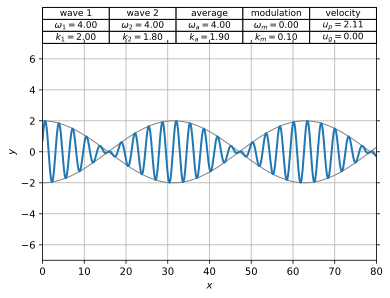

In [3]:
beat(4,1.8,False, True, 0.3)

#### create an animation

In [ ]:
def update(t):
    beat(3.5,1.8,True, True, t)
anim = FuncAnimation(fig, update, frames=np.arange(0,10,0.1), interval=67)

HTML(anim.to_jshtml()) # create an animation control interface using JavaScript
# anim.save('beat.gif') # export a gif file

#### create an interactive interface

In [ ]:
interact(beat,
    ω2 = widgets.FloatSlider(min=ω1-0.5,max=ω1,step=0.05, value=ω1, description=r"$\omega_2$"),
    k2 = widgets.FloatSlider(min=k1-0.3,max=k1,step=0.05, value=k1, description=r"$k_2$"     ),
    k2reversed =    widgets.Checkbox(value=False, description="direction reversed"),
    show_envelope = widgets.Checkbox(value=True , description="show envelope"     ),
    t = widgets.fixed(0.3)
);